<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [108]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [109]:
# Read CSV
house_csv = "Sacramento_transactions.csv"
house = pd.read_csv(house_csv)

In [110]:
house[house.duplicated()]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
342,4734 14TH AVE,SACRAMENTO,95820,CA,2,1,834,Residential,Mon May 19 00:00:00 EDT 2008,68000,38.539447,-121.450858
404,8306 CURLEW CT,CITRUS HEIGHTS,95621,CA,4,2,1280,Residential,Mon May 19 00:00:00 EDT 2008,167293,38.715781,-121.298519
601,7 CRYSTALWOOD CIR,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885962,-121.289436


In [111]:
house.drop_duplicates(subset= ['street', 'city'], keep = 'first', inplace = True)

In [112]:
house[house['sq__ft'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539
966,9197 CORTINA CIR,ROSEVILLE,95678,CA,3,2,0,Condo,Thu May 15 00:00:00 EDT 2008,220000,38.793152,-121.290025
970,3557 SODA WAY,SACRAMENTO,95834,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,224000,38.631026,-121.501879


In [113]:
house_medians = house.groupby(['beds', 'baths'])['sq__ft'].transform('median')
house['sq__ft'] = np.where(house['sq__ft'] == 0, house_medians, house['sq__ft'])
house['sq__ft'].value_counts()

0.0       108
1362.0     19
1609.0     13
2175.0     11
2787.0     10
         ... 
3746.0      1
4400.0      1
1995.0      1
956.0       1
1373.0      1
Name: sq__ft, Length: 607, dtype: int64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

# ANSWER

Target variable is price as we are going to predict it.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [114]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     981 non-null    object 
 1   city       981 non-null    object 
 2   zip        981 non-null    int64  
 3   state      981 non-null    object 
 4   beds       981 non-null    int64  
 5   baths      981 non-null    int64  
 6   sq__ft     981 non-null    float64
 7   type       981 non-null    object 
 8   sale_date  981 non-null    object 
 9   price      981 non-null    int64  
 10  latitude   981 non-null    float64
 11  longitude  981 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 99.6+ KB


<AxesSubplot:>

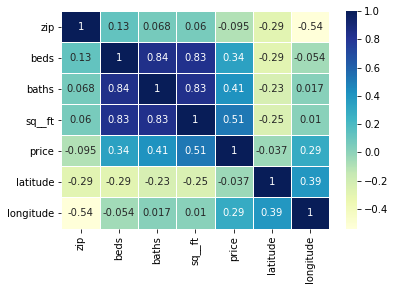

In [115]:
sns.heatmap(house.corr(), annot = True, cmap = "YlGnBu", cbar = True, linewidths = .5)

# ANSWER

In our dataset: zip, beds, baths, sq__ft, latitude and longitude can be  predictor values

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

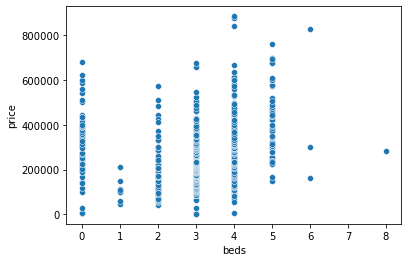

In [116]:
# ANSWER 

# Based on the heatmap above we can see baths, beds and sq-ft are highly correlated with price. However it is best to visualize these 3 variables against price.

import matplotlib.pyplot as plt
sns.scatterplot(x= house['beds'], y = house['price'])
plt.show()

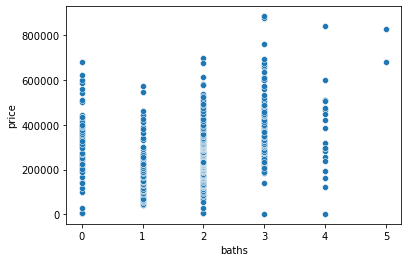

In [117]:
sns.scatterplot(x= house['baths'], y=house['price'])
plt.show()

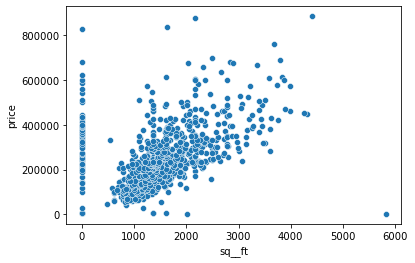

In [118]:
sns.scatterplot(x= house['sq__ft'], y= house['price'])
plt.show()

### Based on the scatterplots above price and sq-ft seems highly correlated

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [119]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [120]:
# ANSWER

X = house['sq__ft'].values.reshape(-1,1)
y = house['price']

In [121]:
reg = LinearRegression()
reg.fit(X,y)


LinearRegression()

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [122]:
# ANSWER
reg.score(X,y)


0.26385412211814585

In [123]:
reg.score(X_train, y_train)

0.24369200413164316

In [124]:
reg.score(X_test, y_test)

0.28947818531999747

In [125]:
import sklearn
sklearn.__version__

'1.0.1'

### 3. Splitting Data

In [99]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [100]:
# ANSWER
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [101]:
# ANSWER
## Check training/test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(657, 1)
(657,)
(324, 1)
(324,)


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [102]:
# ANSWER
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [103]:
# ANSWER
reg.score(X_test, y_test)


0.2810393010220088

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [104]:
# ANSWER

X_value = [[1204]]

y_predict = reg.predict(X_value)
print(y_predict)

[210930.48438908]


#### Find the error

In [105]:
# Predict price from X_test

from sklearn.metrics import mean_squared_error

y_test_pred = reg.predict(X_test)
mean_squared_error(y_test, y_test_pred, squared = True)

15277442891.992998

In [106]:
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cross_v = cross_val_score(reg, X, y, cv = 5)
print(cross_v)
print('Average 5- Fold CV Score : {}'.format(np.mean(cross_v)))

[ 0.18745482  0.20894686  0.42998561 -0.00746889  0.03390318]
Average 5- Fold CV Score : 0.17056431790330995




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



